In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from omegaconf import OmegaConf
from notion_dashboard.notion_client import NotionClient
from notion_dashboard.domain.exercise import get_exercise_data_frame

In [2]:
conf = OmegaConf.load("../config.yaml")
sns.set_context("paper")

In [3]:
notion = NotionClient(
    bearer_token=conf.notion.bearer_token
)

In [4]:
exercises_df = get_exercise_data_frame(
    response_body=notion.query_database(
        database_id=conf.notion.exercise_database
    )
)

In [5]:
exercises_df.head()

,name,date,repetitions,sets,weight,volume,type
0,Incline Bench Press,2022-11-03,8.0,1.0,30.0,240.0,Push
1,Dips,2022-11-03,5.0,2.0,80.0,800.0,Push
2,Leg Press,2022-11-03,10.0,3.0,110.0,3300.0,Push
3,Military Press,2022-11-03,8.0,4.0,20.0,640.0,Push
4,Incline Bench Press,2022-11-03,10.0,2.0,25.0,500.0,Push


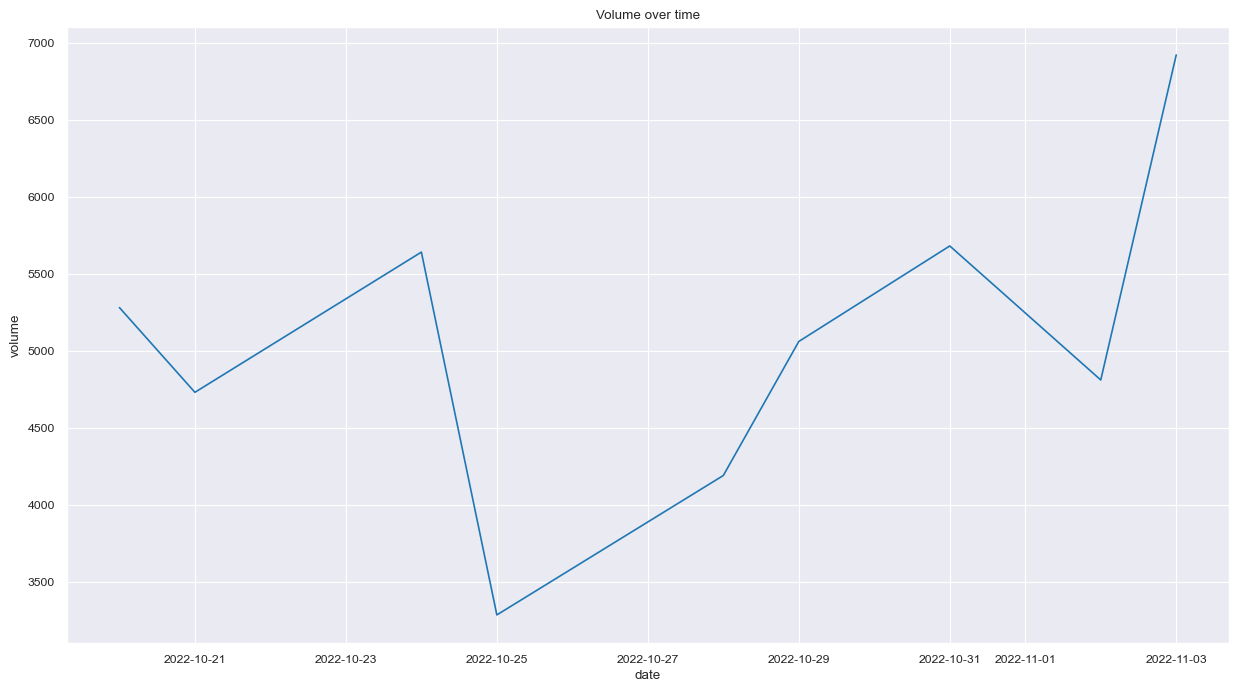

In [6]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    data=exercises_df[["date", "volume"]].groupby(["date"]).sum(),
    x="date",
    y="volume",
)

ax.set_title("Volume over time");

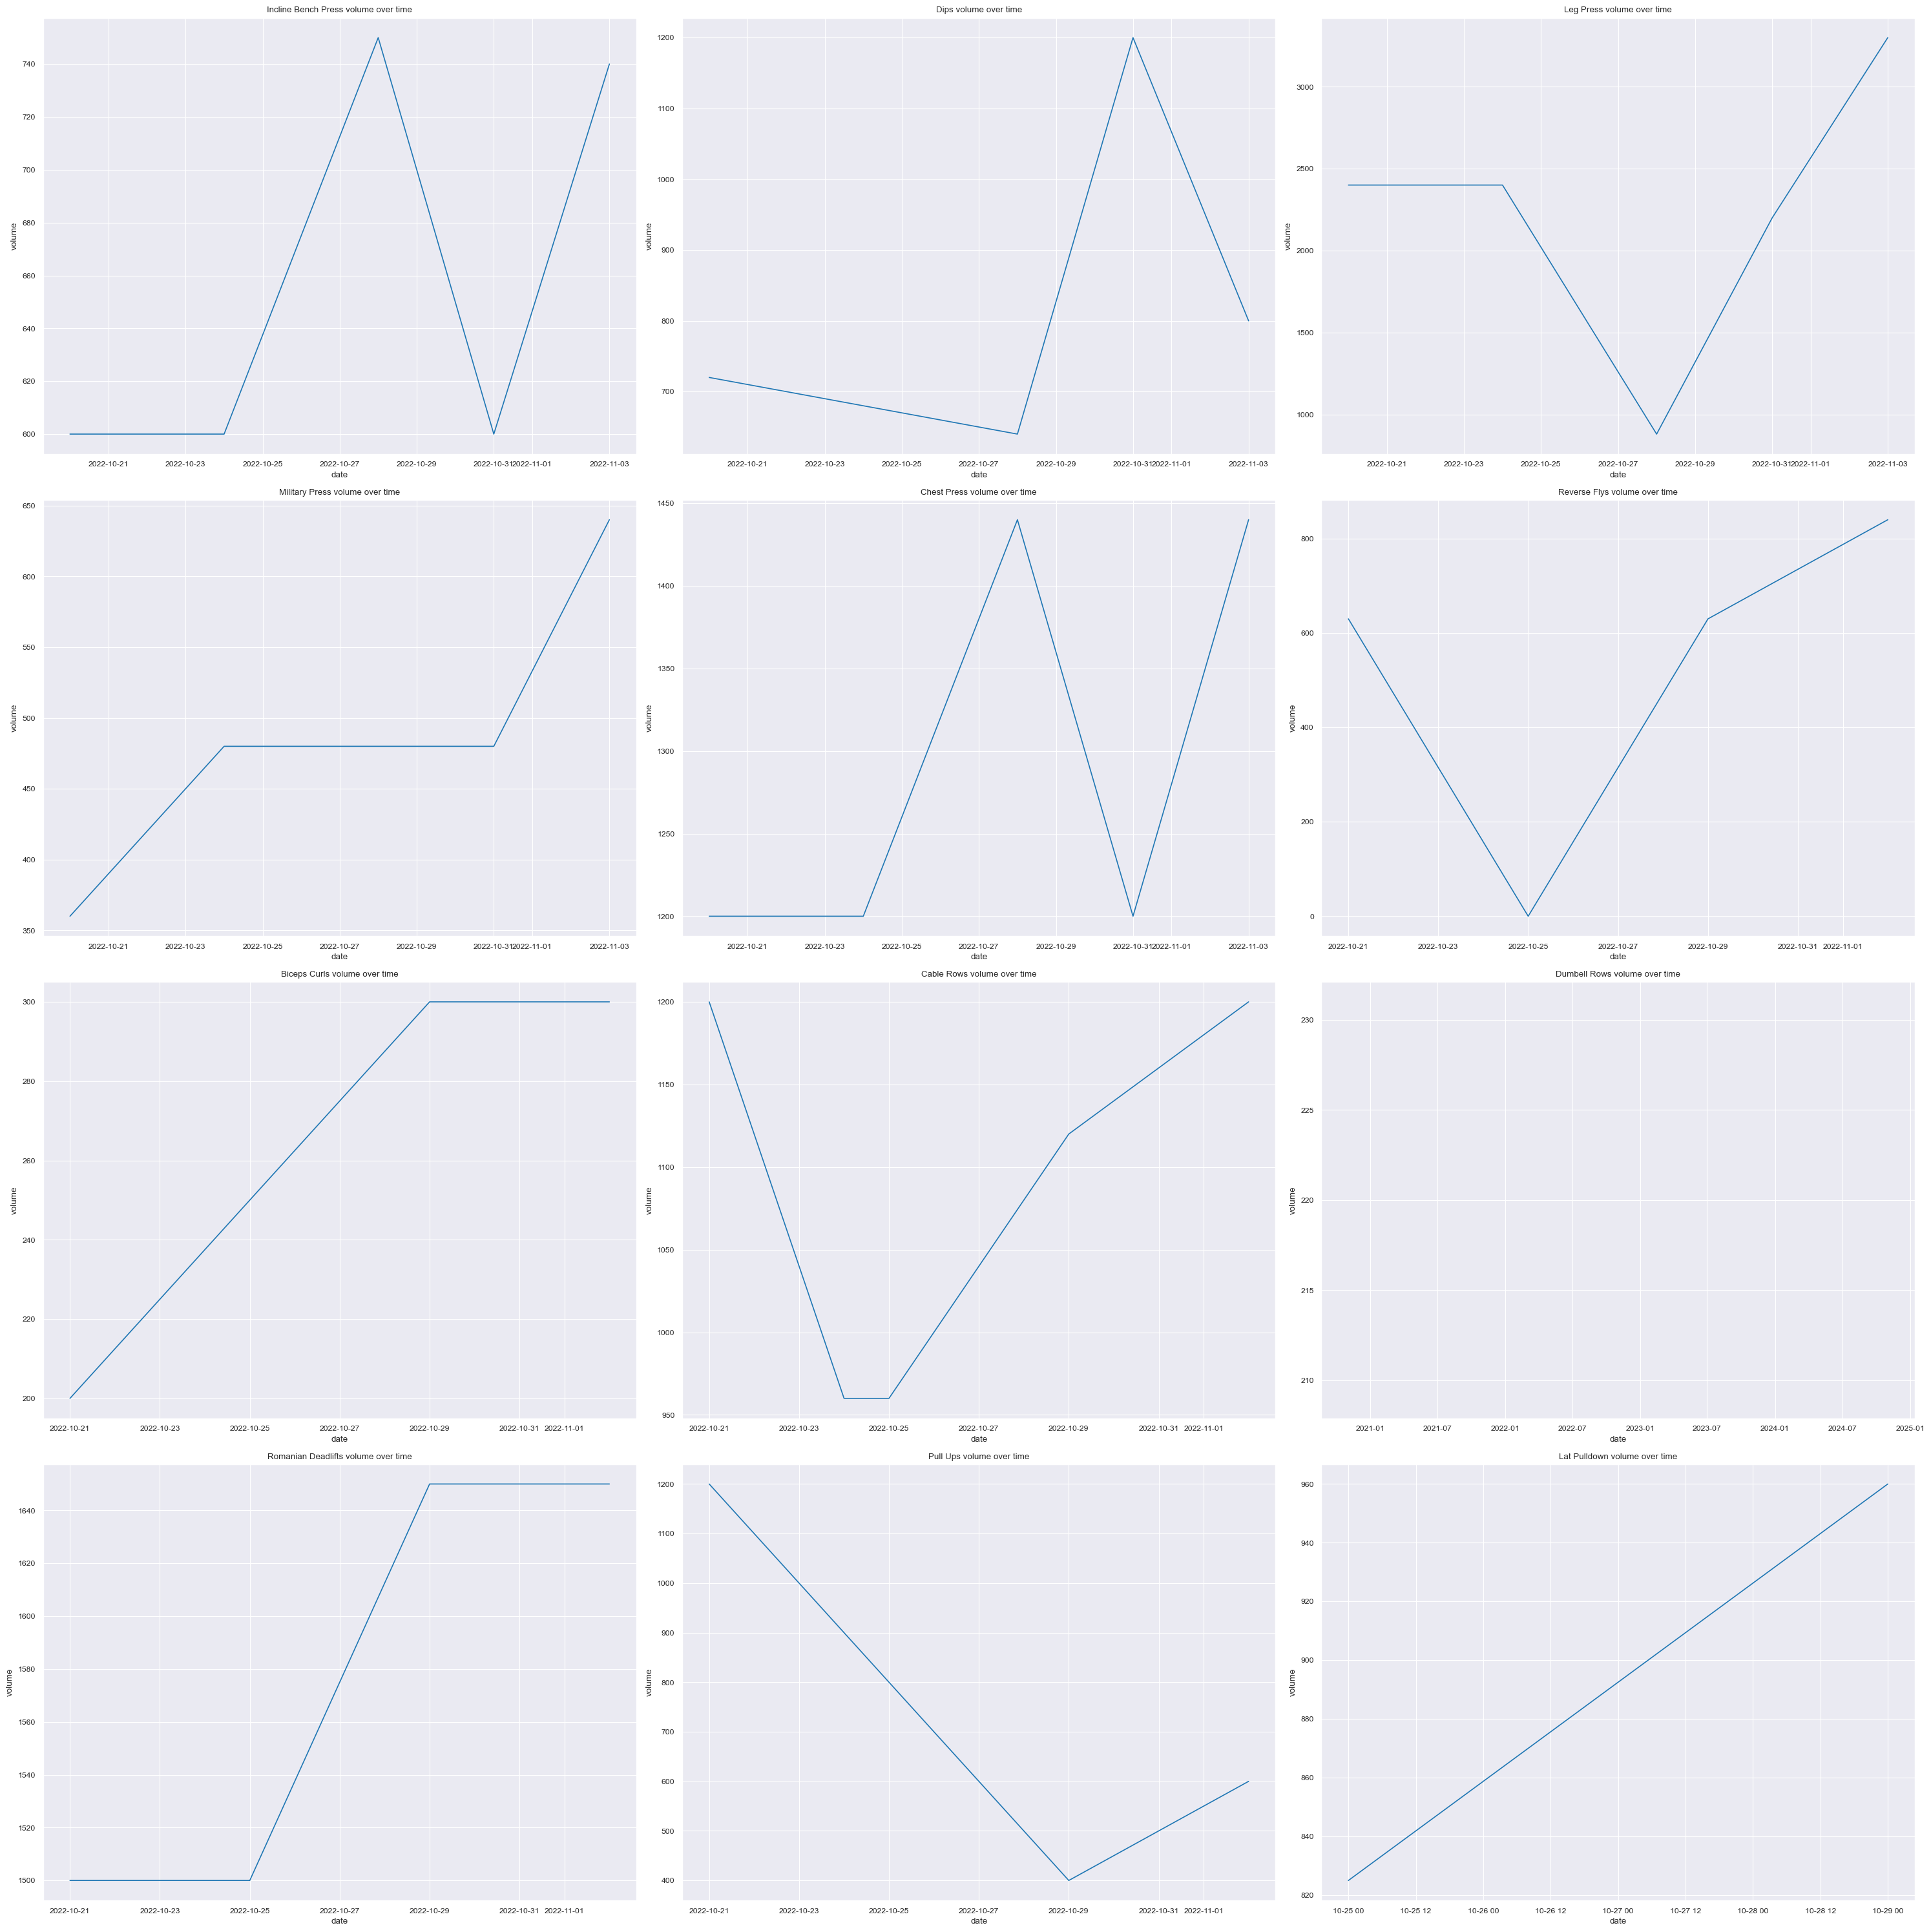

In [7]:
exercises_list = exercises_df["name"].unique().tolist()
n = len(exercises_list)
n_cols = 3
fig, axes = plt.subplots(nrows=math.ceil(n/n_cols), ncols=n_cols, figsize=(30, 30))
for exercise, ax in zip(exercises_list, axes.flatten()):
    sns.lineplot(
        data=exercises_df[exercises_df["name"] == exercise][["date", "volume"]].groupby(["date"]).sum(),
        x="date",
        y="volume",
        ax=ax,
    )
    ax.set_title(f"{exercise} volume over time")
plt.tight_layout()